In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling as pdp
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [2]:
# LOAD DATA
INPUT_DIR  = '../../../input/m5-forecasting-accuracy/'
LOG_NAME = '06_17_22_41_35'
data = pd.read_csv(INPUT_DIR + "sales_train_evaluation.csv")
predicted = np.load(f"../log/{LOG_NAME}/pred_valid.npy")
json_load = json.load(open(f'../log/{LOG_NAME}/params.json', 'r'))

In [3]:
predicted.shape

(1, 28)

In [4]:
predicted

array([[0.3805679 , 0.325697  , 0.27939436, 0.3428563 , 0.6411991 ,
        0.82792723, 0.92667854, 0.4976688 , 0.47949675, 0.46487233,
        0.44630122, 0.57740235, 0.92699444, 0.86063534, 0.5532242 ,
        0.45849696, 0.35831589, 0.41857296, 0.53924334, 0.7102768 ,
        0.79886705, 0.43856966, 0.42476887, 0.3638043 , 0.35438395,
        0.4987668 , 0.72521544, 0.7514309 ]], dtype=float32)

In [5]:
# InverseするためのScalerを作る
data = data.drop('d_1792',axis=1)
use_days = json_load['use_days']
train_x = np.array(data.iloc[:, -1 * (28*2 + use_days) : -28*2]).sum(axis=0).reshape(1,-1)
# train_x = np.array(data.iloc[:, -1 * (28*1 + use_days) : -28*1]).sum(axis=0).reshape(1,-1)
mm = MinMaxScaler(feature_range=(0.05, 0.95))
mm.fit(train_x.T)

MinMaxScaler(copy=True, feature_range=(0.05, 0.95))

In [6]:
# 予測値をInverse Transform
predicted = mm.inverse_transform(predicted)

In [7]:
days = 100
sells = np.array(data.iloc[:, -1 * days : -28]).sum(axis=0)
sells.reshape(1,-1).shape

(1, 72)

In [8]:
np.concatenate([sells.reshape(1,-1),predicted],axis=1)

array([[53715.        , 48337.        , 46152.        , 37702.        ,
        36545.        , 36436.        , 40392.        , 50857.        ,
        52081.        , 37328.        , 33981.        , 34068.        ,
        34615.        , 37649.        , 47887.        , 50915.        ,
        37259.        , 36536.        , 38458.        , 41459.        ,
        39325.        , 52322.        , 57218.        , 40562.        ,
        37727.        , 37032.        , 38267.        , 40887.        ,
        52711.        , 51421.        , 42035.        , 40117.        ,
        36606.        , 35009.        , 39652.        , 46181.        ,
        47825.        , 37360.        , 35475.        , 34786.        ,
        34003.        , 45611.        , 53863.        , 46360.        ,
        36041.        , 33857.        , 32359.        , 34681.        ,
        45536.        , 52672.        , 56425.        , 40418.        ,
        39683.        , 39134.        , 38116.        , 43220.  

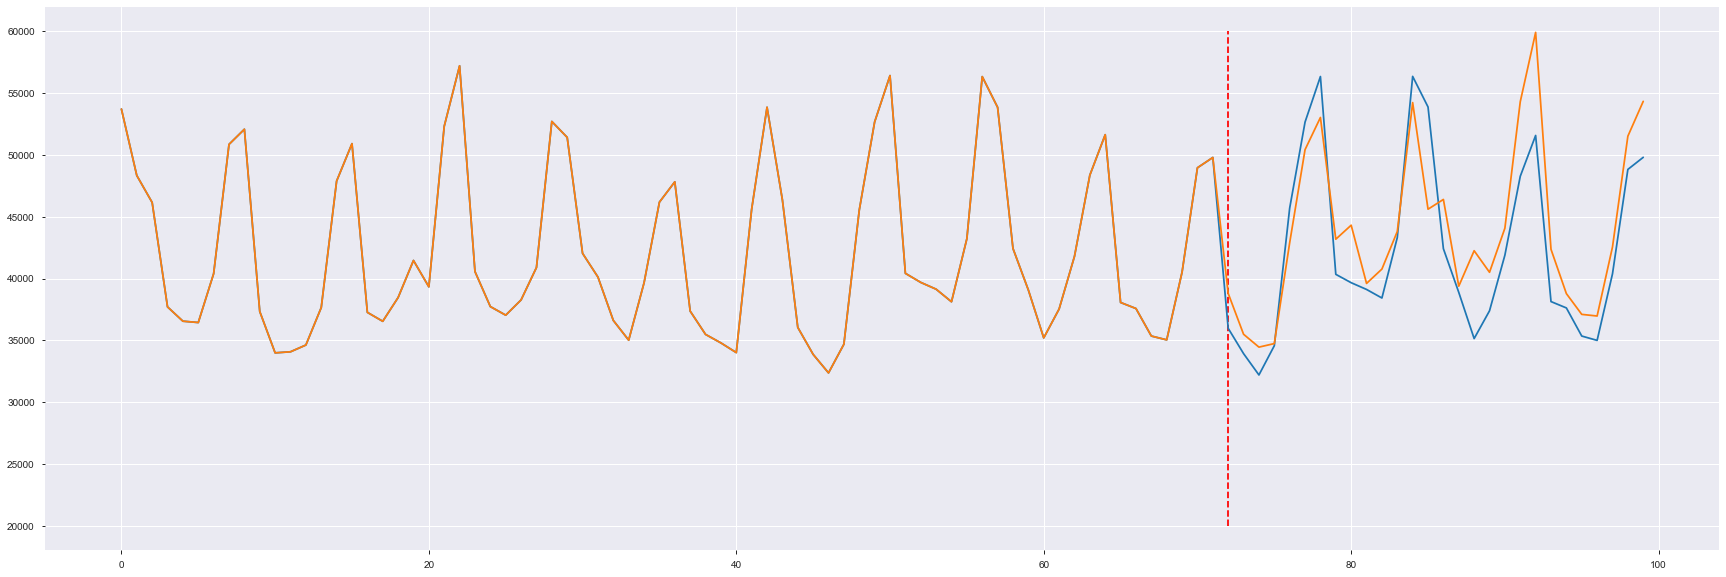

In [9]:
days = 100
f, ax = plt.subplots(figsize=(30, 10))
sells = np.array(data.iloc[:, -1 * days : -28]).sum(axis=0)
plt.plot(np.concatenate([sells.reshape(1,-1),predicted],axis=1).reshape(-1,))
plt.plot(np.array(data.iloc[:, -1 * days :]).sum(axis=0))
# sns.lineplot(predicted.iloc[i, :].index, predicted.iloc[i,:].values.astype("float32"))
plt.vlines(days-28, 20000, 60000, "red", linestyles='dashed')